In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [163]:
data=pd.read_csv('review_data.csv')
data.head()

,restaurant+AF8-id,date,coversCount,beverages,food,other,dayOfWeek,dayOfMonth,dayOfYear,weekOfYear,month,year,weekOfMonth,Weeknum,getStart,weekNumOfYear
0,104,2016+AC0-01+AC0-01,256,76440,81901,23660,5,1,1,1,1,2016,1,1,01/01/16,1
1,104,2016+AC0-01+AC0-02,286,93863,100568,29053,6,2,2,1,1,2016,1,1,01/01/16,1
2,104,2016+AC0-01+AC0-03,137,26579,38730,10631,0,3,3,2,1,2016,1,2,01/01/16,1
3,104,2016+AC0-01+AC0-04,133,14263,37084,5705,1,4,4,2,1,2016,1,2,01/01/16,1
4,104,2016+AC0-01+AC0-05,114,10098,26255,4039,2,5,5,2,1,2016,1,2,01/01/16,1


In [164]:
data.shape

(1427, 16)

In [165]:
data.dtypes

restaurant+AF8-id     int64
date                 object
coversCount           int64
beverages             int64
food                  int64
other                 int64
dayOfWeek             int64
dayOfMonth            int64
dayOfYear             int64
weekOfYear            int64
month                 int64
year                  int64
weekOfMonth           int64
Weeknum               int64
getStart             object
weekNumOfYear        object
dtype: object

In [166]:
data.weekNumOfYear.value_counts()

1        124
40       124
31        93
27        93
18        93
9         93
14        90
22        90
44        87
5         84
48        62
35        60
36        60
32        31
26        31
49        31
19        31
13        30
45        30
10        30
23        30
6         29
+ACo-      1
Name: weekNumOfYear, dtype: int64

In [167]:
data.weekNumOfYear.replace('+ACo-','6',inplace=True)

In [168]:
data.weekNumOfYear.value_counts()

1     124
40    124
31     93
27     93
18     93
9      93
14     90
22     90
44     87
5      84
48     62
36     60
35     60
32     31
26     31
49     31
19     31
6      30
13     30
23     30
45     30
10     30
Name: weekNumOfYear, dtype: int64

In [169]:
data.isnull().sum()

restaurant+AF8-id    0
date                 0
coversCount          0
beverages            0
food                 0
other                0
dayOfWeek            0
dayOfMonth           0
dayOfYear            0
weekOfYear           0
month                0
year                 0
weekOfMonth          0
Weeknum              0
getStart             0
weekNumOfYear        0
dtype: int64

In [170]:
data.weekNumOfYear=data.weekNumOfYear.astype('int64')

In [171]:
data.dtypes

restaurant+AF8-id     int64
date                 object
coversCount           int64
beverages             int64
food                  int64
other                 int64
dayOfWeek             int64
dayOfMonth            int64
dayOfYear             int64
weekOfYear            int64
month                 int64
year                  int64
weekOfMonth           int64
Weeknum               int64
getStart             object
weekNumOfYear         int64
dtype: object

In [172]:
data.skew()

restaurant+AF8-id    0.000000
coversCount          0.913510
beverages            1.115222
food                 1.040445
other                0.966844
dayOfWeek            0.000964
dayOfMonth           0.009090
dayOfYear            0.016082
weekOfYear           0.015528
month                0.006978
year                 0.038763
weekOfMonth          0.091846
Weeknum             -0.002945
weekNumOfYear        0.014342
dtype: float64

In [173]:
data_new=data.drop(['restaurant+AF8-id','date','getStart'],axis=1)

In [174]:
data_new.head()

,coversCount,beverages,food,other,dayOfWeek,dayOfMonth,dayOfYear,weekOfYear,month,year,weekOfMonth,Weeknum,weekNumOfYear
0,256,76440,81901,23660,5,1,1,1,1,2016,1,1,1
1,286,93863,100568,29053,6,2,2,1,1,2016,1,1,1
2,137,26579,38730,10631,0,3,3,2,1,2016,1,2,1
3,133,14263,37084,5705,1,4,4,2,1,2016,1,2,1
4,114,10098,26255,4039,2,5,5,2,1,2016,1,2,1


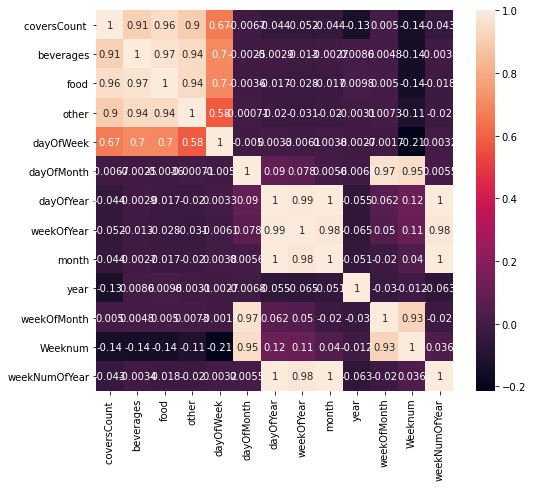

In [175]:
plt.figure(figsize=(8,7))
sns.heatmap(data_new.corr(),annot=True)

In [176]:
data_new.drop(['weekOfMonth','Weeknum'],axis=1,inplace=True)

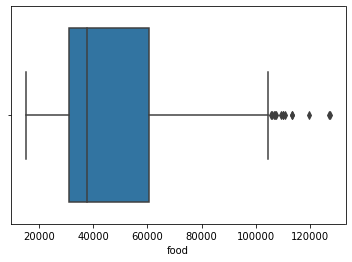

In [177]:
sns.boxplot(data_new.food)

In [178]:
data_new=data_new[(data_new['food']<100000)]

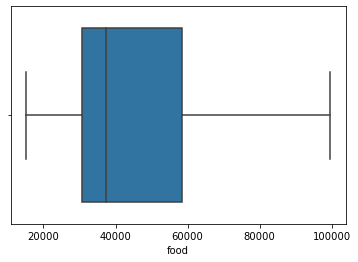

In [179]:
sns.boxplot(data_new.food)

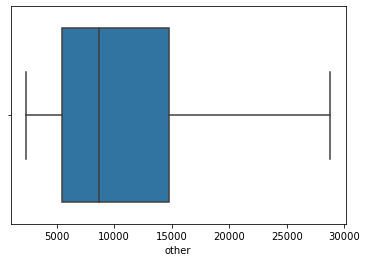

In [180]:
sns.boxplot(data_new.other)

In [181]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_tr=sc.fit_transform(data_new)
data1=pd.DataFrame(data_tr,columns=data_new.columns)

In [182]:
data1.head()

,coversCount,beverages,food,other,dayOfWeek,dayOfMonth,dayOfYear,weekOfYear,month,year,weekNumOfYear
0,0.813559,0.752000,0.790470,0.806663,0.833333,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.309322,0.261478,0.279389,0.313998,0.000000,0.066667,0.005479,0.019231,0.0,0.0,0.0
2,0.292373,0.140316,0.259903,0.127732,0.166667,0.100000,0.008219,0.019231,0.0,0.0,0.0
3,0.211864,0.099342,0.131704,0.064736,0.333333,0.133333,0.010959,0.019231,0.0,0.0,0.0
4,0.313559,0.133931,0.239919,0.117901,0.500000,0.166667,0.013699,0.019231,0.0,0.0,0.0


In [183]:
data1.skew()

coversCount      0.849307
beverages        1.072062
food             0.943509
other            0.927591
dayOfWeek        0.019911
dayOfMonth       0.007654
dayOfYear        0.008567
weekOfYear       0.008035
month           -0.002458
year             0.044642
weekNumOfYear    0.004799
dtype: float64

# # Prediction of coversCount


In [184]:
data_input=data_new.drop(['beverages'],axis=1)


In [185]:
data_output=data_new['coversCount ']

In [186]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_input,data_output,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:1.0
at random state 1 r2score is:1.0
at random state 2 r2score is:1.0
at random state 3 r2score is:1.0
at random state 4 r2score is:1.0
at random state 5 r2score is:1.0
at random state 6 r2score is:1.0
at random state 7 r2score is:1.0
at random state 8 r2score is:1.0
at random state 9 r2score is:1.0
at random state 10 r2score is:1.0
at random state 11 r2score is:1.0
at random state 12 r2score is:1.0
at random state 13 r2score is:1.0
at random state 14 r2score is:1.0
at random state 15 r2score is:1.0
at random state 16 r2score is:1.0
at random state 17 r2score is:1.0
at random state 18 r2score is:1.0
at random state 19 r2score is:1.0
at random state 20 r2score is:1.0
at random state 21 r2score is:1.0
at random state 22 r2score is:1.0
at random state 23 r2score is:1.0
at random state 24 r2score is:1.0
at random state 25 r2score is:1.0
at random state 26 r2score is:1.0
at random state 27 r2score is:1.0
at random state 28 r2score is:1.0
at random state 29 r2sco

In [188]:
from sklearn.model_selection import cross_val_score as cvs

In [189]:
x_train,x_test,y_train,y_test=tts(data_input,data_output,random_state=59,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
cv=cvs(lr,data_input,data_output,cv=10,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 1.0
rscore for training data: 1.0
Cross val score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cv: 1.0


In [190]:
output=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})

In [191]:
output

,Actual values,Predicted values
152,82,82.0
816,102,102.0
1011,99,99.0
570,154,154.0
925,181,181.0
...,...,...
289,112,112.0
358,279,279.0
130,168,168.0
1306,98,98.0


In [192]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1.313871905697324e-13
Mean squared error of test data: 1.5654681241610062e-13
Mean squared error of train data: 1.5982756848488828e-13


# Prediction of Beverages


In [193]:
data_input=data_new.drop(['coversCount '],axis=1)
data_output=data_new['beverages']

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_input,data_output,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:1.0
at random state 1 r2score is:1.0
at random state 2 r2score is:1.0
at random state 3 r2score is:1.0
at random state 4 r2score is:1.0
at random state 5 r2score is:1.0
at random state 6 r2score is:1.0
at random state 7 r2score is:1.0
at random state 8 r2score is:1.0
at random state 9 r2score is:1.0
at random state 10 r2score is:1.0
at random state 11 r2score is:1.0
at random state 12 r2score is:1.0
at random state 13 r2score is:1.0
at random state 14 r2score is:1.0
at random state 15 r2score is:1.0
at random state 16 r2score is:1.0
at random state 17 r2score is:1.0
at random state 18 r2score is:1.0
at random state 19 r2score is:1.0
at random state 20 r2score is:1.0
at random state 21 r2score is:1.0
at random state 22 r2score is:1.0
at random state 23 r2score is:1.0
at random state 24 r2score is:1.0
at random state 25 r2score is:1.0
at random state 26 r2score is:1.0
at random state 27 r2score is:1.0
at random state 28 r2score is:1.0
at random state 29 r2sco

In [195]:
x_train,x_test,y_train,y_test=tts(data_input,data_output,random_state=0,test_size=0.30)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
cv=cvs(lr,data_input,data_output,cv=10,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 1.0
rscore for training data: 1.0
Cross val score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cv: 1.0


In [196]:
output=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})

In [197]:
output

,Actual values,Predicted values
663,12330,12330.0
318,10730,10730.0
228,7525,7525.0
617,54501,54501.0
1255,25885,25885.0
...,...,...
914,9734,9734.0
169,72912,72912.0
1144,13391,13391.0
1122,22512,22512.0


In [198]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1.552621952884094e-11
Mean squared error of test data: 1.890032200387252e-11
Mean squared error of train data: 2.0390292093251887e-11
